<a href="https://colab.research.google.com/github/jrohn34/Cirrhosis_Classification/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cirrhosis Data Set

In [7]:
fname_cirrhosis = '/content/drive/MyDrive/Colab Notebooks/cirrhosis.csv'

In [8]:
df_cirrhosis = pd.read_csv(fname_cirrhosis)

In [9]:
df_cirrhosis.info()
df_cirrhosis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


1. Source of Data:
The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984.

2. Brief Discription of the Data: The Data contains multiple different variables that can lead to the diagnosing future Cirrhosis


3. What is the target: The target is to determine the patients who will develop Cirrhosis

4. What does a row represent: A row represents a human

5. Is this a classification or regression problem: This is a classification problem

6. How many features does the data have: 20

7. How many rows are in the dataset: 418

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset: Cleaning will be difficult because it appears there is a lot of missing data.

# Wine Data Set

In [4]:
fname_wine = '/content/drive/MyDrive/Colab Notebooks/wines_SPA.csv'

In [5]:
df_wine = pd.read_csv(fname_wine)

In [6]:
df_wine.info()
df_wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


1. Source of Data: fedesoriano. (April 2022). Spanish Wine Quality Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

2. Brief description of data: The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description.

3. What is the target: To determine the quality of the best wines

4. What does one row represent: A row represents a wine bottle

5. Is this a classification or regression problem: It is a classification problem

6. How many features does the data have: 11

7. How many rows are in the dataset: 7500

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset: To figure out the best wines because taste is subjective.

# Clean Data

In [34]:
X = df_wine.drop('rating', axis=1)
y = df_wine['rating']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
duplicates = df_wine.duplicated()
print("Number of duplicates:", duplicates.sum())
df_wine.drop_duplicates(inplace=True)   #inspected all of the duplicates and dropped them all

Number of duplicates: 0


In [62]:
df_wine['year'] = pd.to_numeric(df_wine['year'], errors='coerce')
median_year = df_wine['year'].median() #Calculate the mode of year
df_wine['year'].fillna(median_year, inplace = True)
df_wine['year'] = df_wine['year'].astype(int)

In [63]:
mode_type = df_wine['type'].mode()[0]  # Calculate the mode of type
df_wine['type'].fillna(mode_type, inplace=True)

In [64]:
df_wine['body'] = pd.to_numeric(df_wine['body'], errors='coerce')
mean_body = df_wine['body'].mean()  # Calculate the mean of body
df_wine['body'].fillna(mean_body, inplace=True)

In [65]:
df_wine['acidity'] = pd.to_numeric(df_wine['acidity'], errors='coerce')
mean_acidity = df_wine['acidity'].mean()  # Calculate the mean of acidity
df_wine['acidity'].fillna(mean_acidity, inplace=True)

In [46]:
categorical_columns = ['winery','wine','year','country','region','type']

for col in categorical_columns:
    print(df_wine[col].value_counts())  #looping through categorical columns to see if there is any inconsistent values

Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1
El Jardin de las Iguales Vinedo

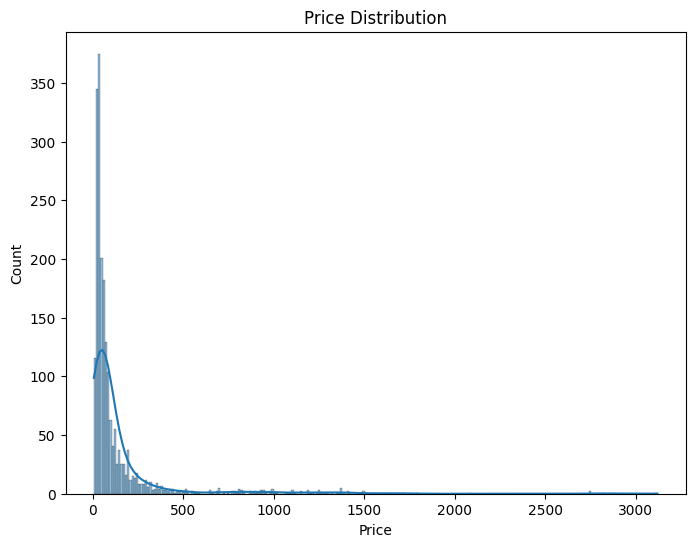

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(df_wine['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Outliers: Cannot determine

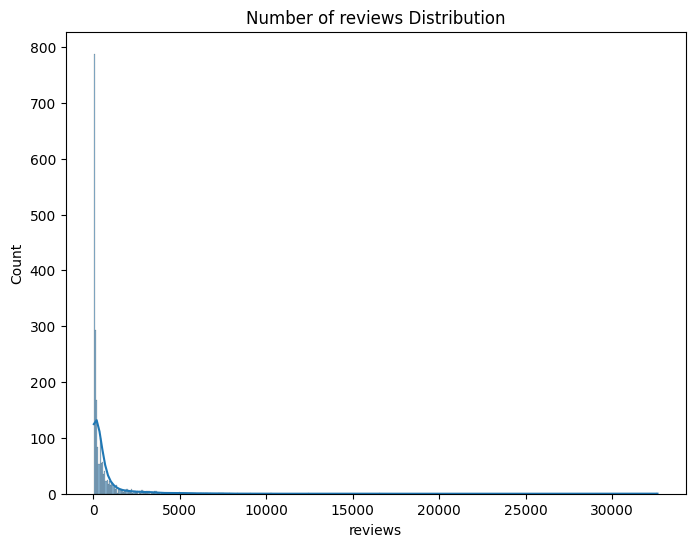

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(df_wine['num_reviews'], kde=True)
plt.title('Number of reviews Distribution')
plt.xlabel('reviews')
plt.ylabel('Count')
plt.show()

Outliers: Cannot determine

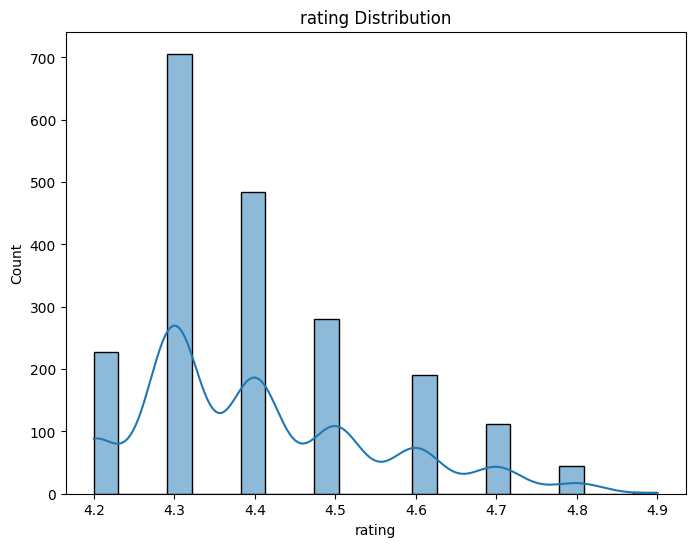

In [49]:
plt.figure(figsize=(8, 6))
sns.histplot(df_wine['rating'], kde=True)
plt.title('rating Distribution')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

Outliers: 4.8

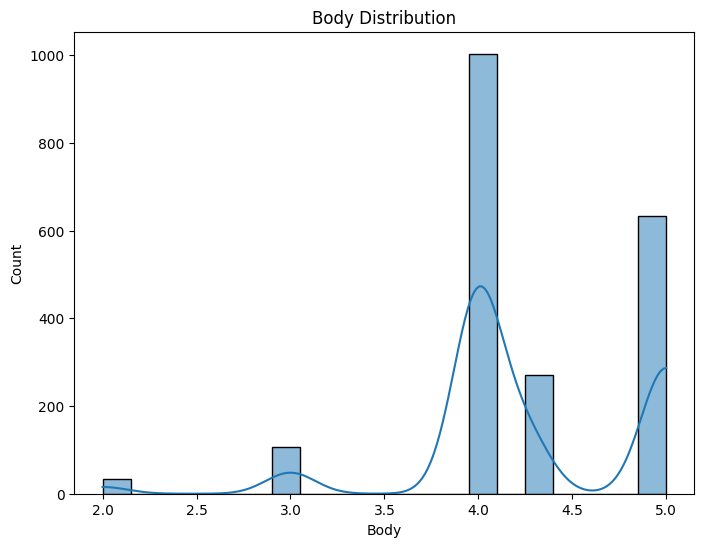

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(df_wine['body'], kde=True)
plt.title('Body Distribution')
plt.xlabel('Body')
plt.ylabel('Count')
plt.show()

Outliers: 2.0

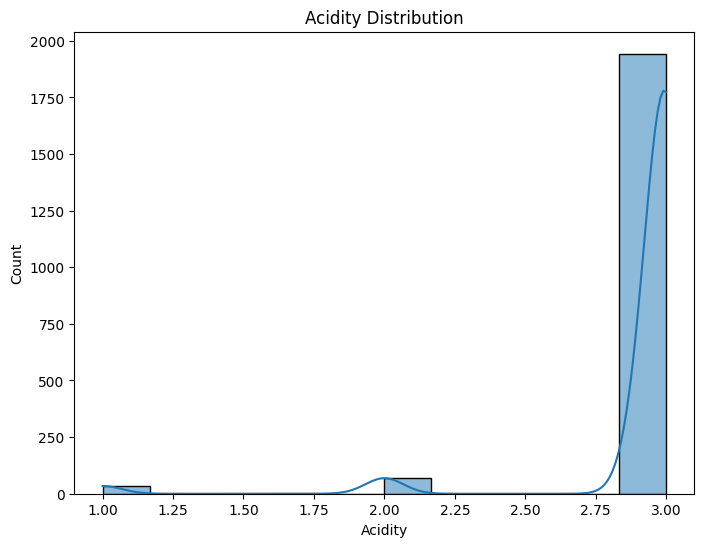

In [57]:
plt.figure(figsize=(8, 6))
sns.histplot(df_wine['acidity'], kde=True)
plt.title('Acidity Distribution')
plt.xlabel('Acidity')
plt.ylabel('Count')
plt.show()

Outliers: 1.00

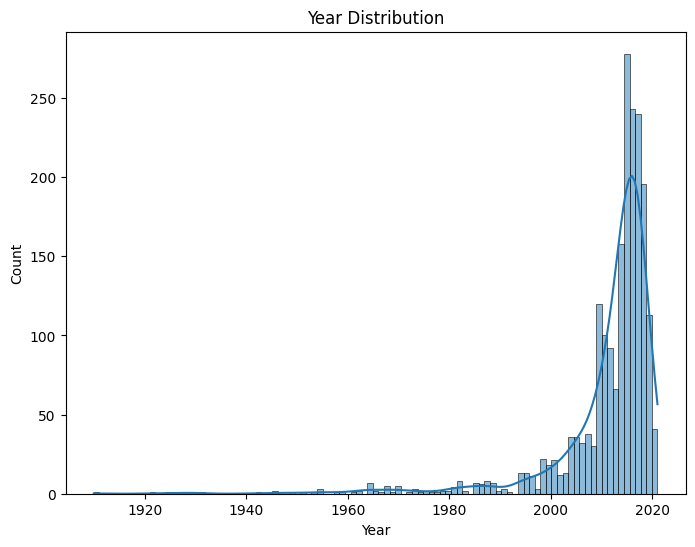

In [66]:
plt.figure(figsize=(8, 6))
sns.histplot(df_wine['year'], kde=True)
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

The outliers are

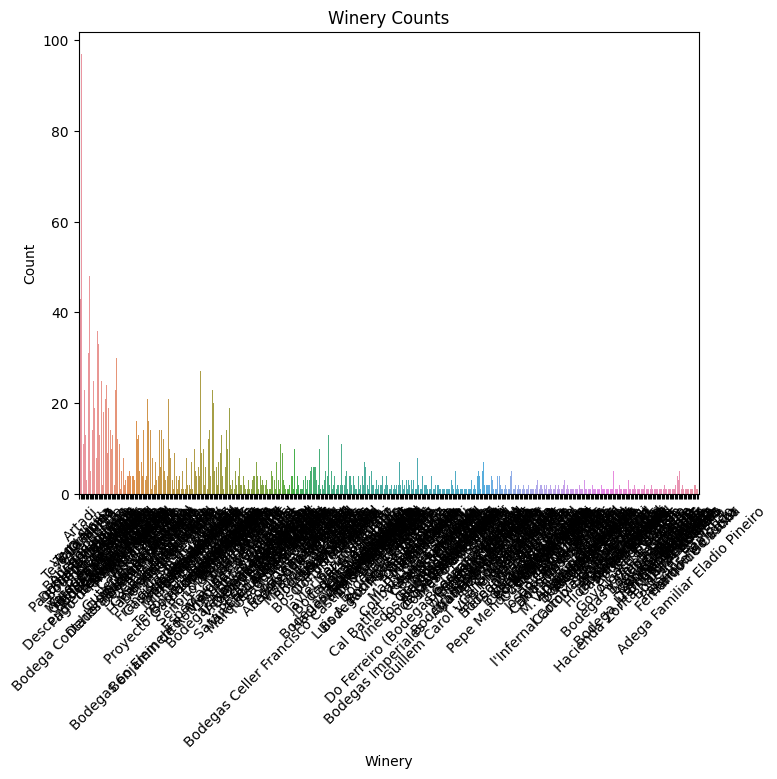

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_wine, x='winery')
plt.title('Winery Counts')
plt.xlabel('Winery')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

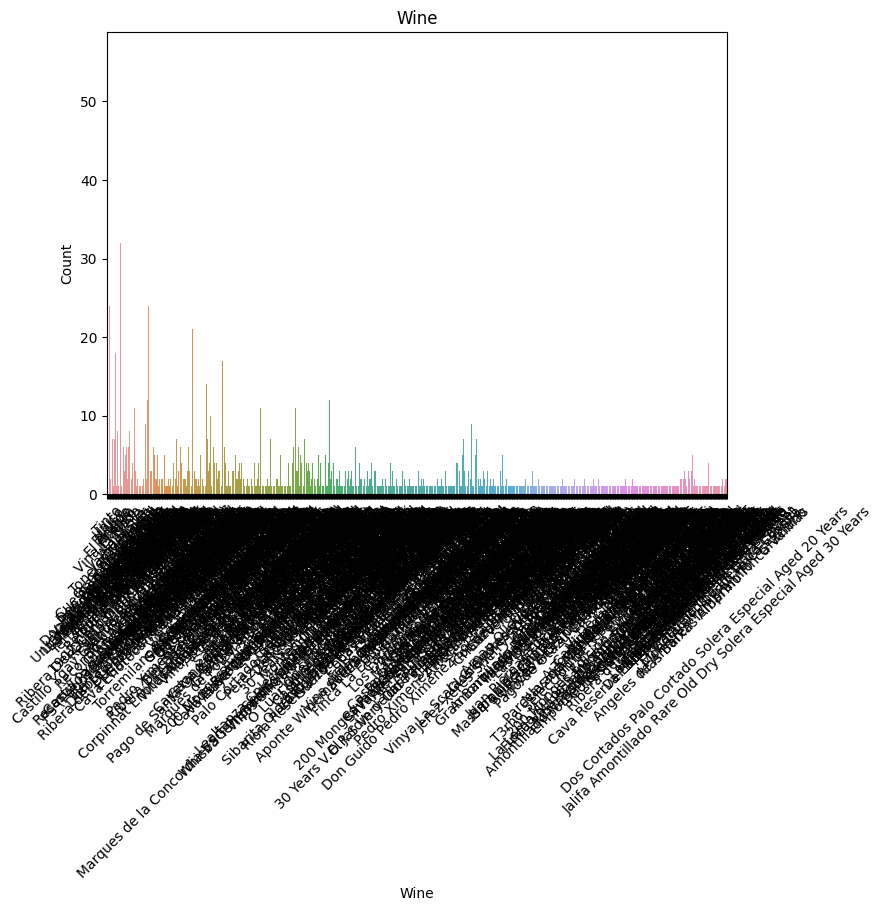

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_wine, x='wine')
plt.title('Wine')
plt.xlabel('Wine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

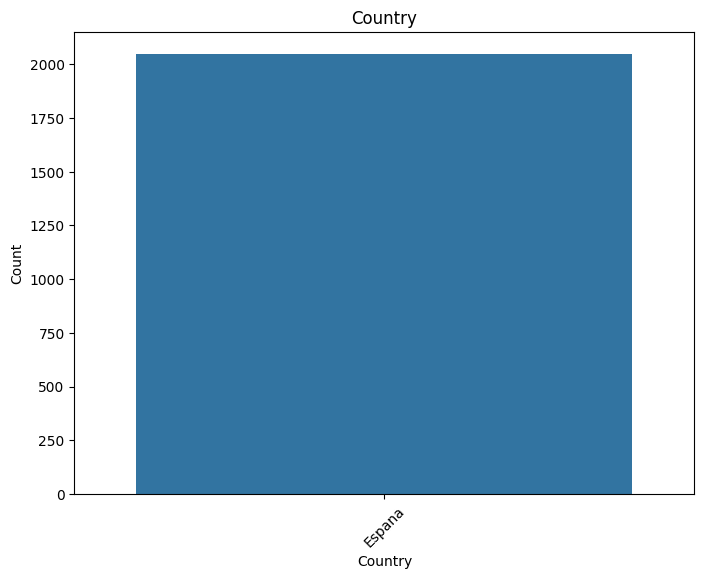

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_wine, x='country')
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Spain is the only country

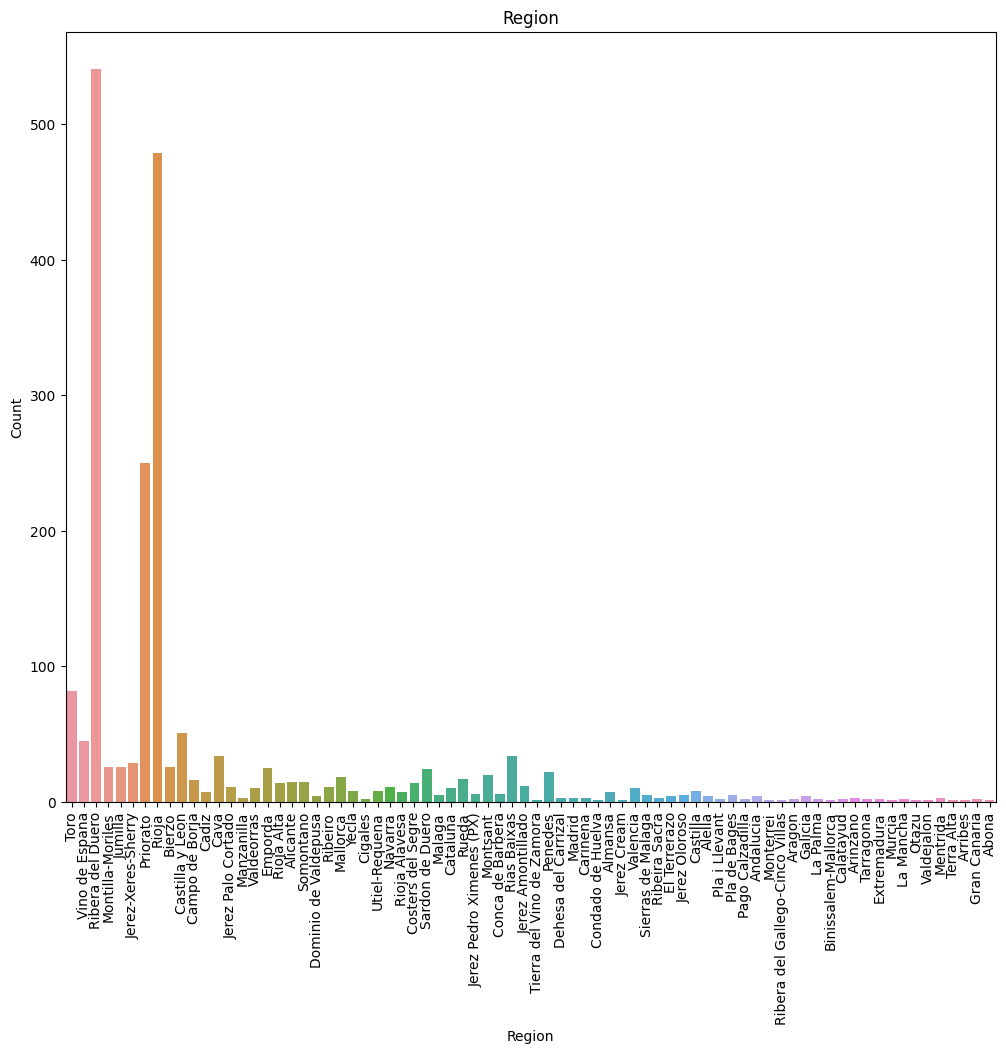

In [74]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df_wine, x='region')
plt.title('Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

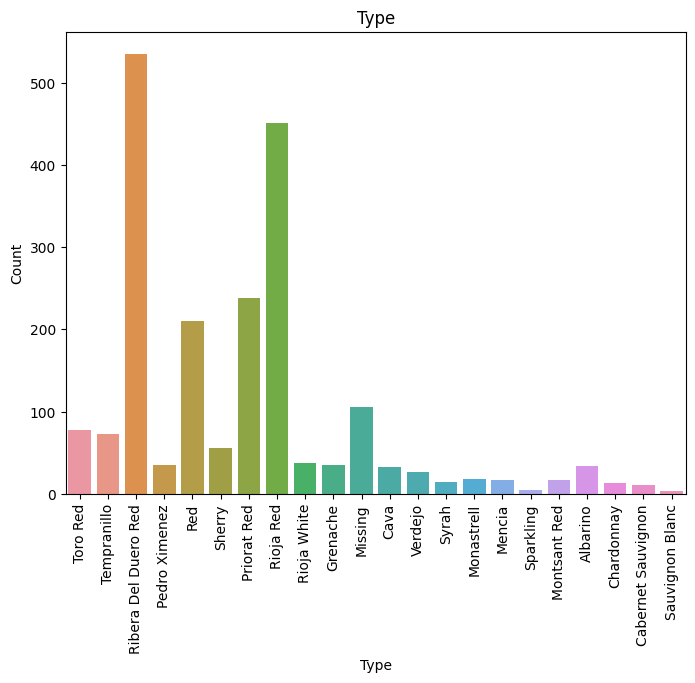

In [71]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_wine, x='type')
plt.title('Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Outliers are Sparkling and Sauvignon Blanc